We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd

In [2]:
passengers=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\Labs\DAFT_212\module_2\Lab_21_Time-Series-Models\airlines_passengers.csv')

Let’s display the first five rows of data

In [3]:
passengers.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [4]:
passengers.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [5]:
passengers['Month']=pd.to_datetime(passengers['Month'],format='%Y-%m')

The next thing we can do is convert the month column to an index. 


In [6]:
passengers.set_index('Month',inplace=True)

Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

In [7]:
import matplotlib.pyplot as plt

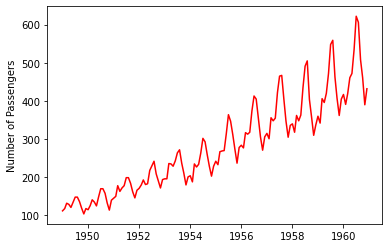

In [8]:
plt.ylabel('Number of Passengers')
plt.plot(passengers,color='red')
plt.show()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [9]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [10]:
adft=adfuller(passengers,autolag='AIC')

Store our results in a dataframe display it

In [11]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]["1%"], adft[4]["5%"], adft[4]["10%"]] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used","critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


In [12]:
"""
The p-value is more than 5%> we can pass the null hypothesis, which means the series is NOT staationary
"""

'\nThe p-value is more than 5%> we can pass the null hypothesis, which means the series is NOT staationary\n'

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

In [13]:
autocorrelation_lag1 = passengers["Passengers"].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498524


Calculate partial autocorrelation

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


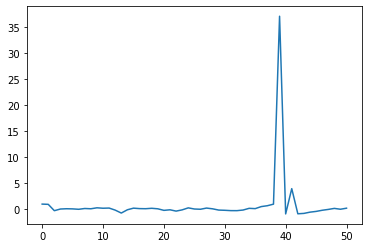

In [14]:
from statsmodels.tsa.stattools import pacf
pac=pacf(passengers, nlags=50, method='ywadjusted', alpha=None)
plt.plot(pac)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


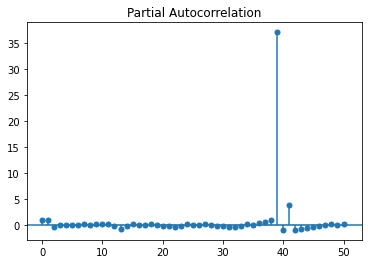

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(passengers, lags=50)
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

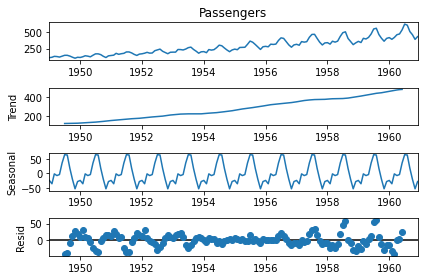

In [17]:
decompose=seasonal_decompose(passengers.Passengers,model='additive')
decompose.plot()
plt.show()

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()



Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [18]:
#Let's make the dataset stationary by using the .diff() method

stationary=passengers.diff().dropna()


<AxesSubplot:xlabel='Month'>

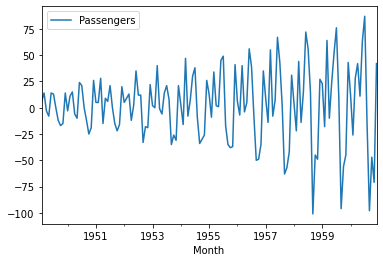

In [19]:
stationary.plot()

MA(1)

In [33]:

from statsmodels.tsa.arima_process import ArmaProcess
mod = ARMA(stationary, order=(0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                -696.414
Method:                       css-mle   S.D. of innovations             31.515
Date:                Tue, 29 Mar 2022   AIC                           1398.827
Time:                        12:56:39   BIC                           1407.716
Sample:                    02-01-1949   HQIC                          1402.439
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4212      3.686      0.657      0.511      -4.803       9.645
ma.L1.Passengers     0.4012      0.089      4.493      0.000       0.226       0.576
                            

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

MA(2)

Display the output

AR(2)

ARMA (?,?)

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [26]:
from pmdarima.arima import auto_arima

Display the output

ARIMA(?,?)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pdmarima
ERROR: No matching distribution found for pdmarima


In [23]:
from pmdarima.arima import auto_arima
model = auto_arima(passengers, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(passengers)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC